In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X,y = make_blobs(n_samples=300, centers=4, random_state=0)

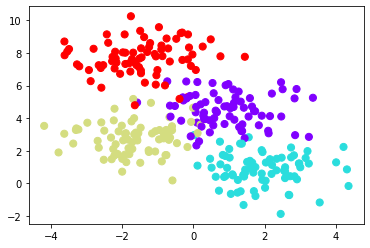

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
import seaborn as sns; sns.set()

In [ ]:
def visualize_tree(model, X, y, ax=None, cmap='rainbow'):
  
  ax = ax or plt.gca()

  ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap=cmap, clim=(y.min(),y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  model.fit(X,y)

  xx,yy = np.meshgrid(np.linspace(*xlim, num=200), 
                      np.linspace(*ylim, num = 200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx,yy,Z, alpha=0.3,
                         levels= np.arange(n_classes+1)-0.5,
                         cmap=cmap, clim=(y.min(), y.max()), zorder=1)
  ax.set(xlim=xlim,ylim=ylim)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'clim'


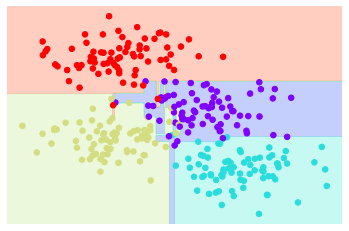

In [ ]:
visualize_tree(DecisionTreeClassifier(), X,y)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
bag = BaggingClassifier(tree, n_estimators=100, max_samples=.80, random_state=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'clim'


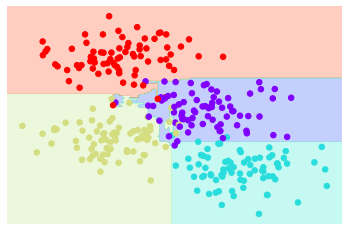

In [ ]:
bag.fit(X,y)
visualize_tree(bag,X,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'clim'


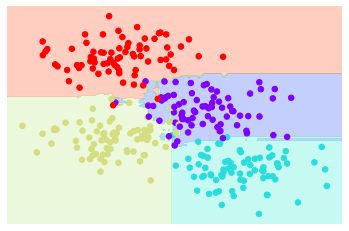

In [ ]:
visualize_tree(model, X, y)

In [ ]:
#generate dataset

x = 10 * np.random.RandomState(42).rand(200)

def model(x, sigma=0.3):
  fast = np.sin(5*x)
  slow = np.sin(0.5*x)
  noise = sigma*np.random.RandomState(42).randn(len(x))

  return slow + fast + noise 

  

<ErrorbarContainer object of 3 artists>

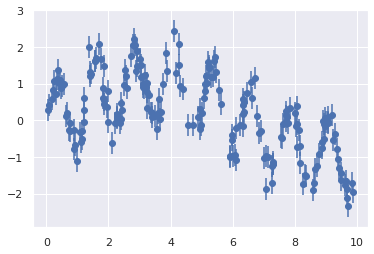

In [ ]:
y = model(x)
plt.errorbar(x,y,0.3, fmt='o')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(200)
forest.fit(x[:,None], y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

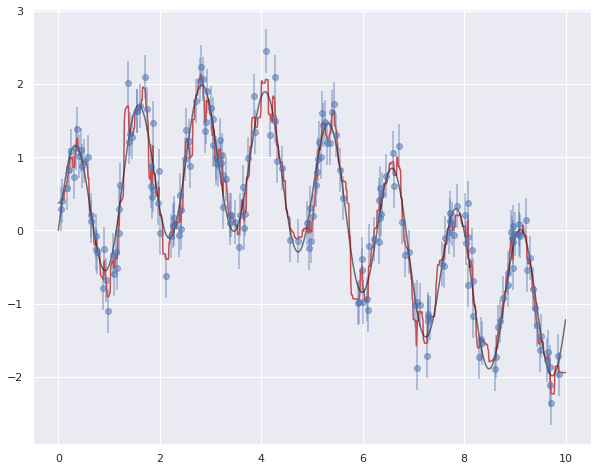

In [ ]:
xfit = np.linspace(0,10,1000)
yfit = forest.predict(xfit[:,None])
ytrue = model(xfit, sigma=0)

plt.figure(figsize=(10,8))
plt.errorbar(x,y,0.3, fmt='o', alpha = 0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=.6)